# Telco Churn Analysis
 
 **Introduction :**
 predicting customer churn is critical for telecommunication companies to be able to effectively retain customers.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
%matplotlib inline

**Load Data**

In [3]:
df = pd.read_csv('C:/Users/lenovo/Downloads/Internship project/Sample Telco Customer dataset/Telcom.csv')

**Overview of dataset**

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,4807-IZYOZ,0,0,0,0,51,1,0,0,2,...,2,2,2,2,2,0,0,20.65,1020.75,0
7007,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,1,103.20,7362.90,0
7008,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7009,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,3,74.40,306.60,1


**Checking unique values of each column**






In [6]:
 for column in df.columns:
        print('Column :{} - Unique Values: {}'.format(column,df[column].unique()))

Column :customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column :gender - Unique Values: [0 1]
Column :SeniorCitizen - Unique Values: [0 1]
Column :Partner - Unique Values: [1 0]
Column :Dependents - Unique Values: [0 1]
Column :Tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column :PhoneService - Unique Values: [0 1]
Column :MultipleLines - Unique Values: [0 1]
Column :InternetService - Unique Values: [1 2 0]
Column :OnlineSecurity - Unique Values: [0 1 2]
Column :OnlineBackup - Unique Values: [1 0 2]
Column :DeviceProtection - Unique Values: [0 1 2]
Column :TechSupport - Unique Values: [0 1 2]
Column :StreamingTV - Unique Values: [0 1 2]
Column :StreamingMovies - Unique Values: [0 1 2]
Column :Contract - Unique Values: [0 1 2]


# Exploratory Data Analysis and Data Cleaning

 **Summary of dataset**

In [8]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7011 non-null   object 
 1   gender            7011 non-null   int64  
 2   SeniorCitizen     7011 non-null   int64  
 3   Partner           7011 non-null   int64  
 4   Dependents        7011 non-null   int64  
 5   Tenure            7011 non-null   int64  
 6   PhoneService      7011 non-null   int64  
 7   MultipleLines     7011 non-null   int64  
 8   InternetService   7011 non-null   int64  
 9   OnlineSecurity    7011 non-null   int64  
 10  OnlineBackup      7011 non-null   int64  
 11  DeviceProtection  7011 non-null   int64  
 12  TechSupport       7011 non-null   int64  
 13  StreamingTV       7011 non-null   int64  
 14  StreamingMovies   7011 non-null   int64  
 15  Contract          7011 non-null   int64  
 16  PaperlessBilling  7011 non-null   int64  


 **Drop the customerID column from the dataset**

The CustomerID column is useless to explain whether not the customer will churn.

In [10]:
 df.drop(columns='customerID',inplace=True)

 **Unique elements of the paymentMethod column**

In [12]:
df.PaymentMethod.unique()

array([2, 3, 0, 1], dtype=int64)

**Bank transfer  (0), Credit card  (1), Electronic cheque (2), Mailed cheque (3).**

In [13]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.504636,0.162316,0.482955,0.298959,32.426615,0.903295,0.422051,1.224076,0.719298,0.77735,0.776351,0.722579,0.816574,0.820996,0.68906,0.592212,1.573242,64.798645,2283.620126,0.265868
std,0.500014,0.368767,0.499745,0.457834,24.542847,0.295577,0.493922,0.778727,0.796531,0.77822,0.778575,0.795621,0.763104,0.761254,0.83317,0.491458,1.067423,30.094030,2266.680399,0.441826
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,35.550000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,70.350000,1397.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,89.900000,3798.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,3.000000,118.750000,8684.800000,1.000000


# **In the given data label encoding and one-hot-encoding is satisdied.**

**there for we go for next process**

In [14]:
df ['Churn'].value_counts()

0    5147
1    1864
Name: Churn, dtype: int64

In [15]:
 print(df['Tenure'].max())

72


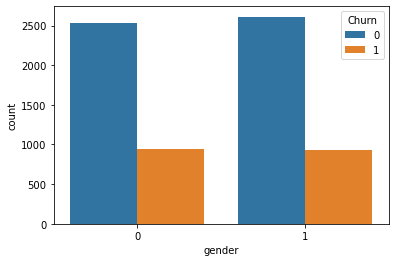

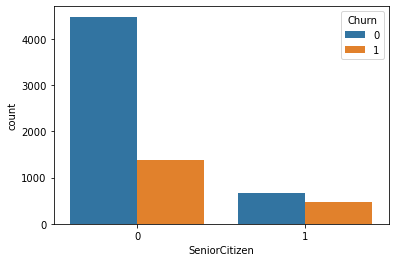

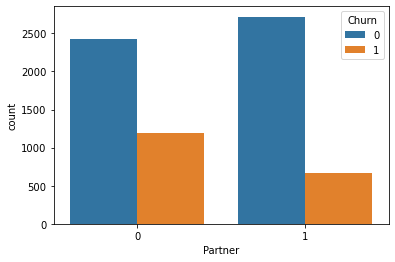

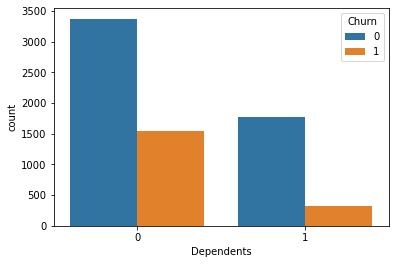

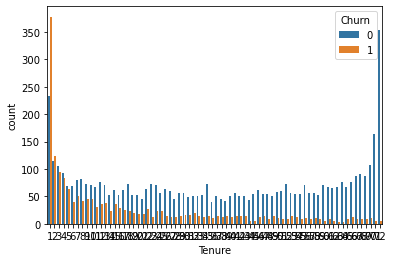

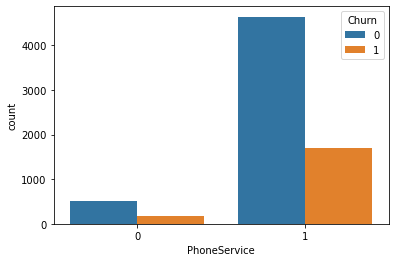

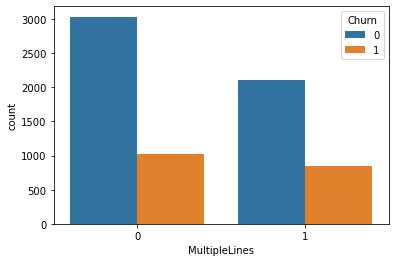

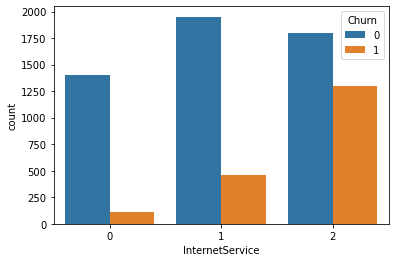

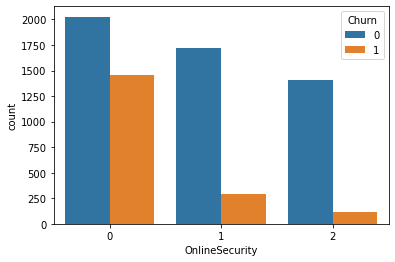

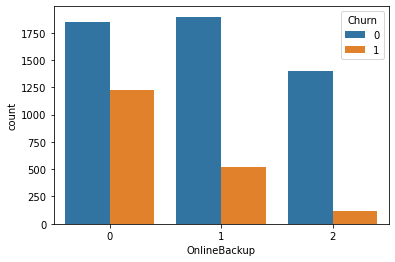

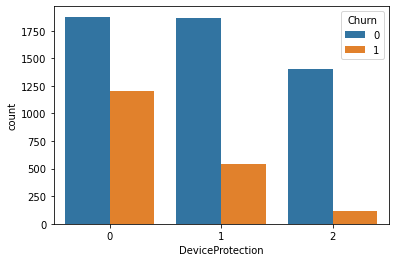

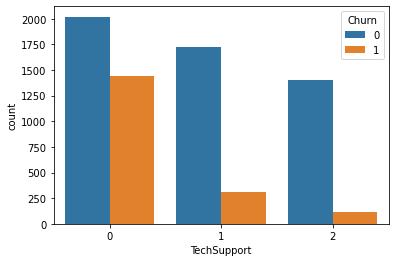

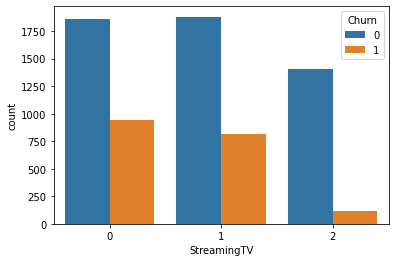

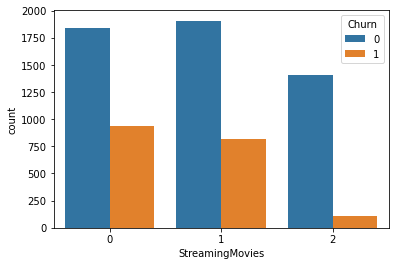

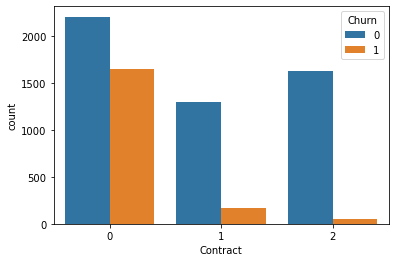

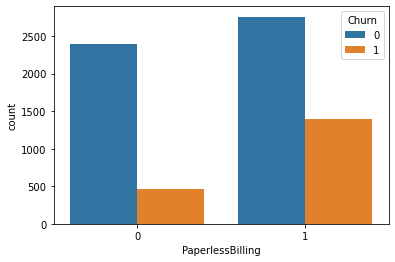

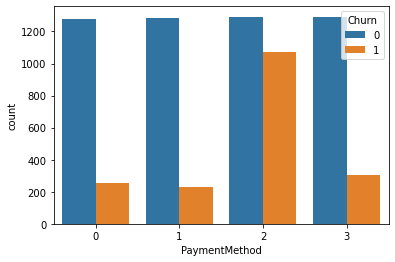

In [16]:
 for i, predictor in enumerate (df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

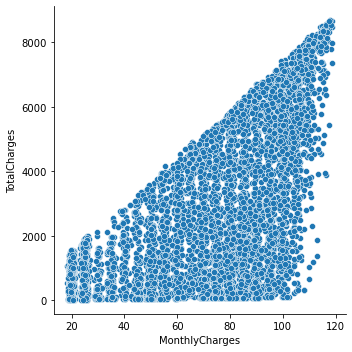

In [54]:
sns.relplot(data=df, x='MonthlyCharges', y='TotalCharges')
plt.show()
 

**Churn by monthly Charges and Total Charges**

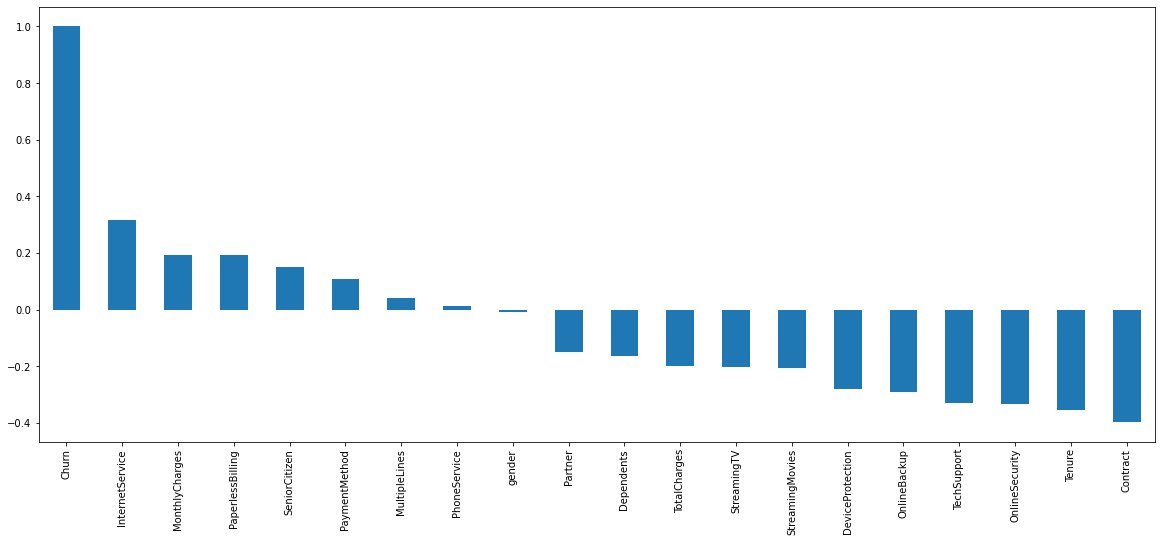

In [55]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [58]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels = corelation.columns,annot = True)

SyntaxError: invalid non-printable character U+00A0 (2852070627.py, line 2)

# Splitting the data into Training and Testing Sets

In [36]:
# select independent variables
x = df.drop(columns = 'Churn')
 
# select depentent variables    
y = df.loc[:,'Churn']

print(x.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Churn


In [23]:
from sklearn.model_selection import train_test_split 

 **testing and training**

In [24]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state=40, shuffle=True)

**Assessing Multiple Algorithms**

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

**Create Models**

In [34]:
def create_models(seed=2):
    
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines',SVC(random_state=seed)))
    models.append(('random_forest',RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

#create a list with all the algorithms
models = create_models()

**Test the accuracy of the each model using default hyperparameters**

In [38]:
results = []
names = []
Scoring = 'accuracy'
for name, model in models:
    
    #fit the models with the traning data
    model.fit(x_train, y_train).predict(x_test)
    
    #make prediction with testing data
    predictions = model.predict(x_test)
    
    #calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    #append the model nae and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    
    #print classifier accuracy
    print('Classifier: {},Accuracy: {})'.format(name,accuracy))

Classifier: k_nearest_neighbors,Accuracy: 0.7604107244723332)
Classifier: logistic_regression,Accuracy: 0.8054763262977752)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: support_vector_machines,Accuracy: 0.7450085567598402)
Classifier: random_forest,Accuracy: 0.7900741585852824)
Classifier: gradient_boosting,Accuracy: 0.8106103822019395)
